## Analysing and prepocessing the diabetes dataset

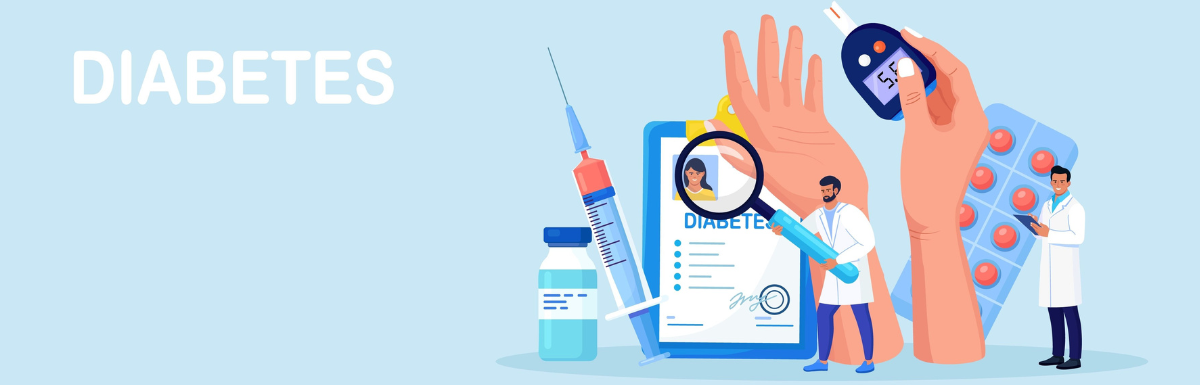

## Table of Contents :
* [Introduction :](#intro)
* [Loading Data :](#ILoading-Data)
* [Cleaning Data :](#Cleaning-Data)
* [Data Exploration :](#Data-Exploration)
    1. [Univariate Visualization :](#Univariate-Visualization) 
    2. [Bivariate Visualization :](#Bivariate-Visualization)
        - [HbA1c_level vs. diabetes :](#hb-dia)
        - [bmi vs diabetes :](#bmi-dia)
        - [blood_glucose_level vs diabetes](#blood-dia)

<a id="intro"></a>
## Introduction :

* **In this Notbook I will perform initial analysis of the dataset and preprocessing to prepare it for the actual model.**

<a id="ILoading-Data"></a>
## Importing libraries and loading the Dataset:

In [1]:
#Step-1 : importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, AllKNN
from imblearn.under_sampling import InstanceHardnessThreshold, NeighbourhoodCleaningRule, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE , ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Change the resolution of the figure :
plt.rcParams['figure.dpi']=80

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [4]:
#Step-2 reading data :-
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<a id="Cleaning-Data"></a>
## Preprocessing the Dataset:

In [5]:
# Step 3  Cleaning
##data size :
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


* No nulls present inside dataset.

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# duplicates records :-
df.duplicated().sum()

3854

<a id="Data-Exploration"></a>
## Exploration of Data:

<a id="Univariate-Visualization"></a>
### 1. Univariate Analysis :

In [9]:
# gender :
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [10]:
# removing records with gender not defined "low number of records which will not affect the result"
df = df[df['gender']!='Other']

num_var = list(df['gender'].value_counts().values)
labels = list(df['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))

print(num_var)
print(labels)

[58552, 41430]
['Female', 'Male']


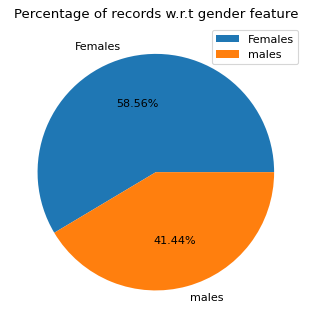

In [11]:
# Gender visualization
plt.pie(count_dict.values(), labels = ['Females', 'males'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t gender feature');

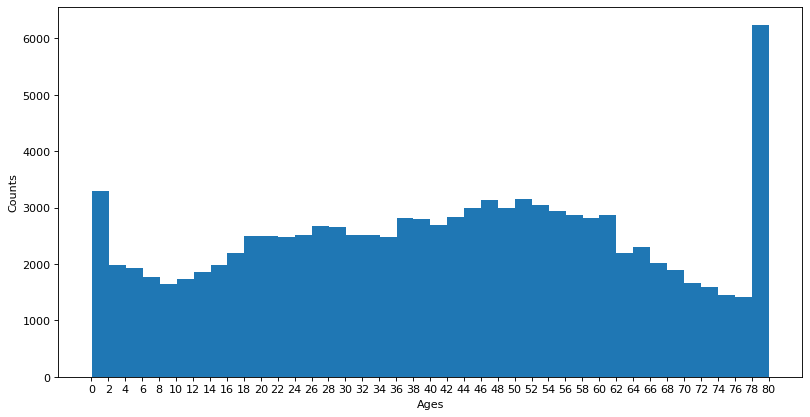

In [12]:
# age :
plt.figure(figsize = [12,6]);
plt.hist(df['age'], bins = 40);
plt.xlabel('Ages');
plt.ylabel('Counts');
plt.xticks(np.arange(0,82,2));

In [13]:
# hypertension :
df['hypertension'].value_counts()

hypertension
0    92497
1     7485
Name: count, dtype: int64

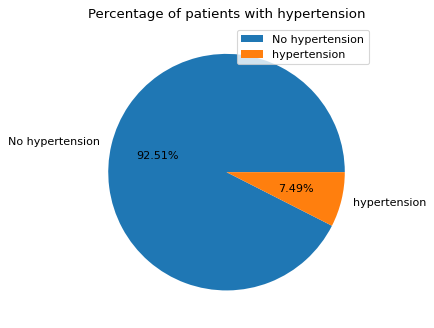

In [14]:
num_var = list(df['hypertension'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['No hypertension', 'hypertension'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with hypertension');

In [15]:
# heart_disease :
df['heart_disease'].value_counts()

heart_disease
0    96040
1     3942
Name: count, dtype: int64

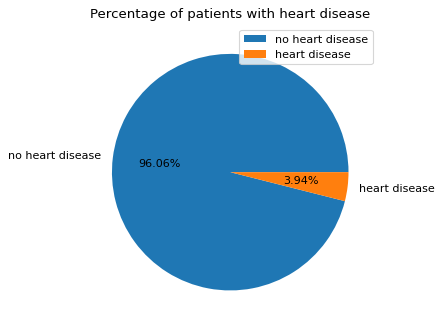

In [16]:
num_var = list(df['heart_disease'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['no heart disease', 'heart disease'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with heart disease');

In [17]:
# smoking_history :
df['smoking_history'].value_counts()

smoking_history
No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: count, dtype: int64

In [18]:
df[df['smoking_history'] == 'No Info'].shape[0] / df.shape[0] *100

35.81644696045288

* 35.81% of records have **no info** about smoking history, which is considerably high. Thus, we may remove this column to maintain better data integrity 

In [19]:
# removing smoking_history column :
df = df.drop(columns = ['smoking_history'])

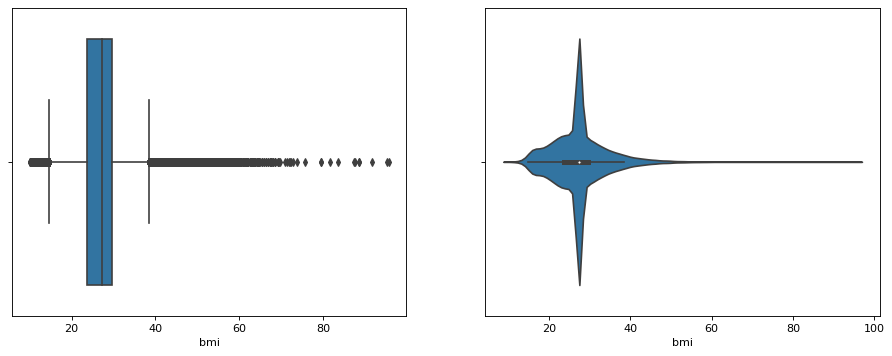

In [20]:
# bmi :
plt.figure(figsize = [14,5]);
plt.subplot(1,2,1);
sb.boxplot(data = df, x = 'bmi');

plt.subplot(1,2,2);
sb.violinplot(data = df, x = 'bmi');

In [21]:
# It is clear from the plot that, there are outliers which we need to remove.
# 1. frist calculation IQR
IQR = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)

# determine the upper and lower boundries : 
upper_boundry = df['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = df['bmi'].quantile(0.25) - (IQR*1.5)

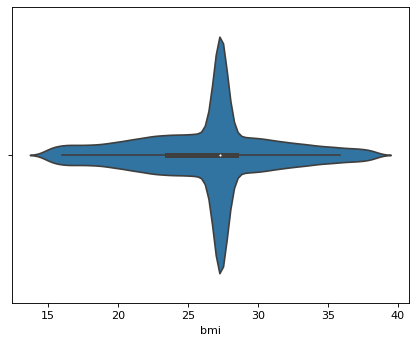

In [22]:
# removing outliers :
df = df[df['bmi'] <= upper_boundry]
df = df[df['bmi'] >= lower_boundry]

sb.violinplot(data = df, x = 'bmi');

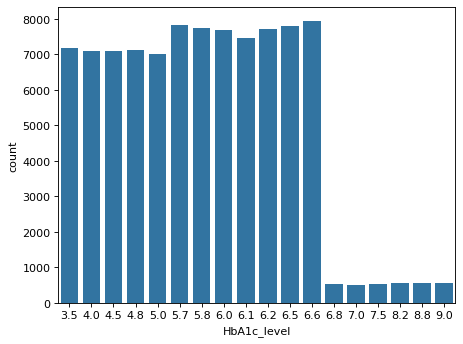

In [23]:
# HbA1c_level :
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = df['HbA1c_level'], color = base_color);

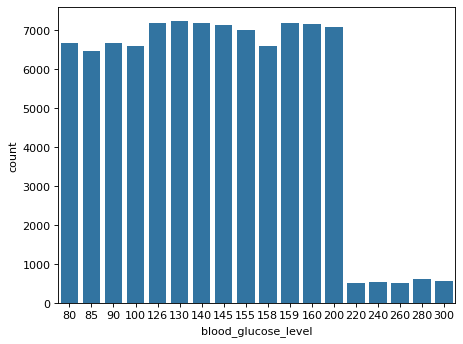

In [24]:
# blood_glucose_level :
sb.countplot(data = df, x = df['blood_glucose_level'], color = base_color);

In [25]:
# diabetes :-
labels = list(df['diabetes'].value_counts().index)
num_var = list(df['diabetes'].value_counts().values)
print(labels)
print(num_var)

[0, 1]
[85875, 7022]


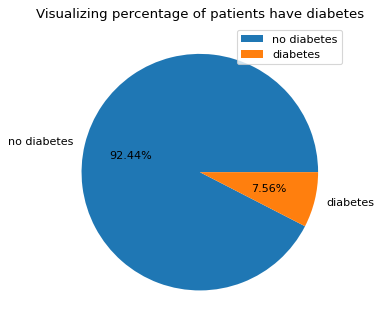

In [26]:
# [0] return to 'no diabetes' and [1] return to 'diabetes'
plt.pie(num_var, labels = ['no diabetes', 'diabetes'],autopct='%1.2f%%');
plt.legend();
plt.title('Visualizing percentage of patients have diabetes');

In [27]:
# reset index after removing some outliers and duplicates :-
df = df.reset_index(drop=True)

<a id="Bivariate-Visualization"></a>
### 2. Bivariate Analysis :

**We will try to create some new features for better visualization**

<a id="hb-dia"></a>
### 1. HbA1c_level vs. diabetes:

<b>HbA1c_level </b>
- A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

- we will create a new feature bassed on the value of (HbA1C)

| HbA1c level | initial diagnosis |
|------|------|
| < 5.7 | Normal|
| 5.7 – 6.4 | Prediabetes|
| >= 6.5 | Diabetes|

<b> Resource : </b>

1. <a> https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html</a>

In [28]:
diagnosing = []
for value in df['HbA1c_level']:
    if value < 5.7:
        diagnosing.append('normal')
        
    elif (5.7 <= value) and (value <= 6.4):
        diagnosing.append('prediabetes')
        
    elif (value >= 6.5):
        diagnosing.append('diabetes')
        
df['initial_diagnosis'] = diagnosing

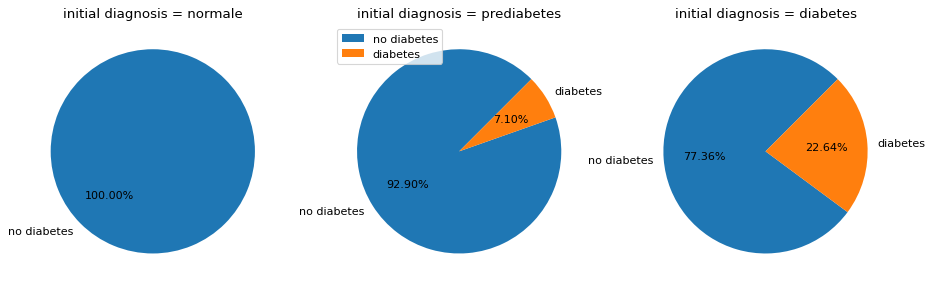

In [29]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['initial_diagnosis'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = normale');

plt.subplot(1,3,2);
plt.pie(df[df['initial_diagnosis'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['initial_diagnosis'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('initial diagnosis = diabetes');

* we can see that the value of **HbA1c_level** affect on the prediction whether it diabetes or not 
* when the value of **HbA1c_level** lies on normale value , we see that there is no records with diabetes
* as **HbA1c_level** value increases, number of records with diabetes increases ## specially when it >= 6.5 

| HbA1c level | initial diagnosis | actual diagnosis 
|------|------|------|
| < 5.7 | Normal| 100% no diabetes 
| 5.7 – 6.4 | Prediabetes| 7.47% have diabetes 
| >= 6.5 | Diabetes| 23.64% have diabetes 

<a id="bmi-dia"></a>
### 2. bmi vs diabetes:

<b>BMI </b>
-  Body mass index is a measure of body fat based on height and weight that applies to adult men and women.
-  it is the weight in kilograms divided by height in meters squared

| BMI | Category |
|------|------|
| =< 18.5 | Underweight|
| 18.5 – 24.9 | Normal|
| 25 – 29.9 | Overweight|
| >= 30 | Obesity|

<b> Resources : </b>

1. <a> https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test </a>
2. <a> https://www.cdc.gov/diabetes/basics/getting-tested.html </a>

In [30]:
weight_type = []

for value in df['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')
        
    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')
        
    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')
        
    elif (value > 29.9):
        weight_type.append('obesity')
        
df['weight_type'] = weight_type

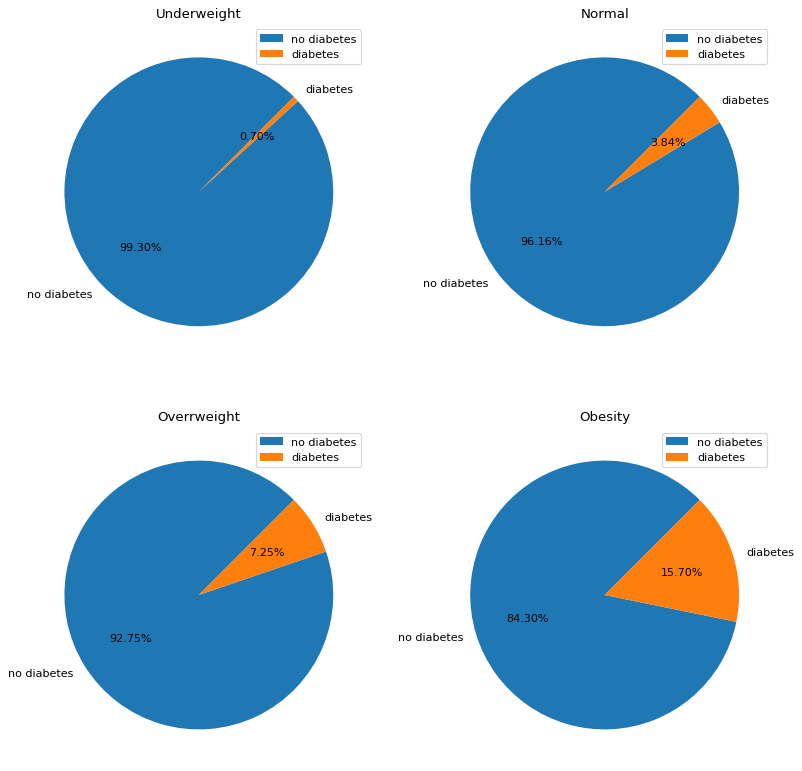

In [31]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [12,12]);

plt.subplot(2,2,1);
plt.pie(df[df['weight_type'] == 'underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(df[df['weight_type'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(df[df['weight_type'] == 'overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(df[df['weight_type'] == 'obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

* according to ordinal category **['underweight','normal','overweight','obesity']**, as weight category increases, percentage of patients with diabetes increase.

| BMI | Category | Prediction
|------|------|------|
| =< 18.5 | Underweight| 0.7% have diabetes 
| 18.5 – 24.9 | Normal| 3.85% have diabetes
| 25 – 29.9 | Overweight| 7.88% have diabetes 
| >= 30 | Obesity| 15.94% have diabetes

<a id="blood-dia"></a>
### 3. blood_glucose_level vs diabetes :-

<b>blood_glucose_level </b>

| blood_glucose_level | Category |
|------|------|
| =< 99 | normal|
| 100 – 125| Prediabetes|
| >= 126 | Diabetes|

<b> Resources : </b>

1. <a> https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test </a>
2. <a>  https://www.cdc.gov/diabetes/basics/getting-tested.html </a>

In [32]:
sugar_test = []

for value in df['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')
        
    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')
        
    elif (value > 125):
        sugar_test.append('diabetes')
        
df['sugar_test'] = sugar_test

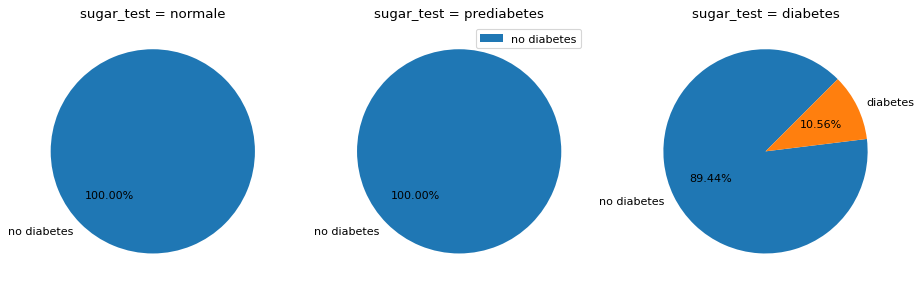

In [33]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['sugar_test'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = normale');

plt.subplot(1,3,2);
plt.pie(df[df['sugar_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['sugar_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('sugar_test = diabetes');

#### all patients with diabetes have high sugar test result ( > 126)

In [34]:
# deep exploration :....

# isolate record with 'blood_glucose_level' values >= 126.
high_sugar_result = df[df['blood_glucose_level'] >= 126]

# counts number of patients have diabetes.
counts  = pd.DataFrame(high_sugar_result.groupby(['blood_glucose_level'])['diabetes'].sum())

# create a columns with total number of patients and the percentage of them who have diabetes 
counts['total'] = high_sugar_result['blood_glucose_level'].value_counts().sort_index()
counts['percentage'] = round((counts['diabetes'] / counts['total'])*100,2)

counts = counts.reset_index()
counts

,blood_glucose_level,diabetes,total,percentage
0,126,527,7190,7.33
1,130,566,7231,7.83
2,140,522,7178,7.27
3,145,543,7142,7.60
4,155,482,7019,6.87
5,158,0,6599,0.00
6,159,544,7197,7.56
7,160,584,7150,8.17
8,200,542,7081,7.65
9,220,500,500,100.00


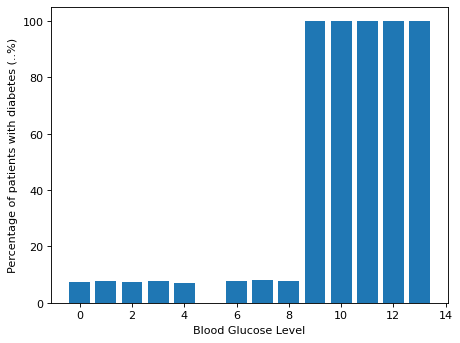

In [35]:
# barplot for visual representation :
plt.bar(counts.index, counts['percentage']);
plt.xlabel('Blood Glucose Level');
plt.ylabel('Percentage of patients with diabetes (..%)');

* Patients with **['blood_glucose_level']** between **126 to 200** , around 7.5 of them have already diabetes and that whose **['blood_glucose_level'] >= 220** , all of then have accually diabetes .